## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 35 columns):
DAMAGE_PROPERTY       11959 non-null float64
DURATION_SECONDS      11959 non-null float64
BEGIN_LAT             11959 non-null float64
BEGIN_LON             11959 non-null float64
TOR_LENGTH            11959 non-null float64
TOR_WIDTH             11959 non-null float64
YEAR                  11959 non-null float64
MULTI_VORT_IND        11959 non-null int64
OPEN_WATER_PROP       11959 non-null float64
DEV_OPEN_PROP         11959 non-null float64
DEV_LOW_PROP          11959 non-null float64
DEV_MED_PROP          11959 non-null float64
DEV_HIGH_PROP         11959 non-null float64
BARREN_LAND_PROP      11959 non-null float64
DECID_FOREST_PROP     11959 non-null float64
EVERGR_FOREST_PROP    11959 non-null float64
MIXED_FOREST_PROP     11959 non-null float64
SHRUB_SCRUB_PROP      11959 non-null float64
GRASS_LAND_PROP       11959 non-null float64
PASTURE_HAY_PROP      11959 non-null f

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [0]]


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 1 columns):
DAMAGE_PROPERTY    11959 non-null float64
dtypes: float64(1)
memory usage: 93.5 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:, 2:34]

tornado_features = tornado_features.drop(["TOR_LENGTH",
                                          "TOR_WIDTH",
                                          "YEAR",
                                          "MULTI_VORT_IND",
                                          "TOR_AREA",
                                          "EXP_INC_AREA",
                                          "DAY_OF_YEAR",
                                          "MONTH"],
                                         axis = 1)


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 24 columns):
BEGIN_LAT             11959 non-null float64
BEGIN_LON             11959 non-null float64
OPEN_WATER_PROP       11959 non-null float64
DEV_OPEN_PROP         11959 non-null float64
DEV_LOW_PROP          11959 non-null float64
DEV_MED_PROP          11959 non-null float64
DEV_HIGH_PROP         11959 non-null float64
BARREN_LAND_PROP      11959 non-null float64
DECID_FOREST_PROP     11959 non-null float64
EVERGR_FOREST_PROP    11959 non-null float64
MIXED_FOREST_PROP     11959 non-null float64
SHRUB_SCRUB_PROP      11959 non-null float64
GRASS_LAND_PROP       11959 non-null float64
PASTURE_HAY_PROP      11959 non-null float64
CULT_CROPS_PROP       11959 non-null float64
WOOD_WETLAND_PROP     11959 non-null float64
HERB_WETLAND_PROP     11959 non-null float64
INCOME                11959 non-null float64
MOB_HOME_DENS         11959 non-null float64
POP_DENS              11959 non-null

In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.1532
 0.6540
 0.0873
   ⋮    
-1.4219
 0.1532
 0.2814
[torch.DoubleTensor of size 11959x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


-1.6434e+00 -4.3226e-01  1.0059e+00  ...   2.4012e-01  9.9841e-01 -8.0985e-01
 2.0633e-01  5.5447e-01  2.5095e-01  ...   6.0023e-01  2.2936e-01  5.1571e-01
-3.3130e-01 -8.9907e-01  6.5406e-01  ...  -5.8070e-01 -1.0991e+00 -1.1142e+00
                ...                   ⋱                   ...                
 1.1642e+00 -1.2164e+00  2.8103e-01  ...  -1.3975e+00 -1.6350e+00  7.8164e-01
-1.2487e+00  6.1127e-01  1.0901e-01  ...   9.1690e-01  4.8438e-01  2.6054e-01
-4.7014e-01 -3.4764e-02  1.6123e+00  ...   5.8210e-01 -4.3274e-01 -3.8082e-01
[torch.DoubleTensor of size 11959x24]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


-1.6434e+00 -4.3226e-01  1.0059e+00  ...   2.4012e-01  9.9841e-01 -8.0985e-01
 2.0633e-01  5.5447e-01  2.5095e-01  ...   6.0023e-01  2.2936e-01  5.1571e-01
-3.3130e-01 -8.9907e-01  6.5406e-01  ...  -5.8070e-01 -1.0991e+00 -1.1142e+00
                ...                   ⋱                   ...                
 1.1642e+00 -1.2164e+00  2.8103e-01  ...  -1.3975e+00 -1.6350e+00  7.8164e-01
-1.2487e+00  6.1127e-01  1.0901e-01  ...   9.1690e-01  4.8438e-01  2.6054e-01
-4.7014e-01 -3.4764e-02  1.6123e+00  ...   5.8210e-01 -4.3274e-01 -3.8082e-01
[torch.FloatTensor of size 11959x24]

## Round 1: One-Hidden-Layer Neural Network

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 1))

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

In [12]:
# Get the iterations
iterations = list(range(0, 10000))

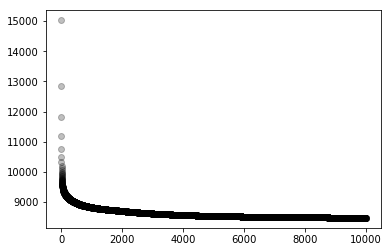

In [13]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(11959)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

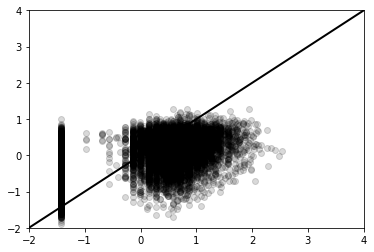

In [16]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)


# Quick check
valid_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 1 columns):
DAMAGE_PROPERTY    3987 non-null float64
dtypes: float64(1)
memory usage: 31.2 KB


In [18]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 2:34]

valid_predictors = valid_predictors.drop(["TOR_LENGTH",
                                          "TOR_WIDTH",
                                          "YEAR",
                                          "MULTI_VORT_IND",
                                          "TOR_AREA",
                                          "EXP_INC_AREA",
                                          "DAY_OF_YEAR",
                                          "MONTH"],
                                         axis = 1)


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)


# Quick check
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 24 columns):
BEGIN_LAT             3987 non-null float64
BEGIN_LON             3987 non-null float64
OPEN_WATER_PROP       3987 non-null float64
DEV_OPEN_PROP         3987 non-null float64
DEV_LOW_PROP          3987 non-null float64
DEV_MED_PROP          3987 non-null float64
DEV_HIGH_PROP         3987 non-null float64
BARREN_LAND_PROP      3987 non-null float64
DECID_FOREST_PROP     3987 non-null float64
EVERGR_FOREST_PROP    3987 non-null float64
MIXED_FOREST_PROP     3987 non-null float64
SHRUB_SCRUB_PROP      3987 non-null float64
GRASS_LAND_PROP       3987 non-null float64
PASTURE_HAY_PROP      3987 non-null float64
CULT_CROPS_PROP       3987 non-null float64
WOOD_WETLAND_PROP     3987 non-null float64
HERB_WETLAND_PROP     3987 non-null float64
INCOME                3987 non-null float64
MOB_HOME_DENS         3987 non-null float64
POP_DENS              3987 non-null float64
TOT_DEV_INT  

In [19]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 3093.3425
[torch.FloatTensor of size 1]

In [20]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [21]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(3987)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

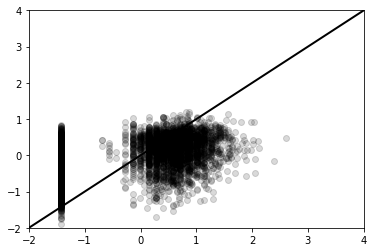

In [22]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

In [23]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.5902 -0.3162 -0.1500  0.2612 -0.4420  0.3481 -0.0676 -0.1398 -0.2678 -0.2226
 0.3338 -0.0186 -0.0975  0.1384  0.0877 -0.2143 -0.0435  0.0200 -0.1251 -0.2015
 0.1781 -0.0556  0.1291 -0.1071  0.0543  0.0756 -0.1877  0.2896 -0.2813  0.2053
 0.0798 -0.0742 -0.0409  0.2357  0.2025  0.0341 -0.0442 -0.3237  0.1017  0.1111
-0.1180 -0.0052 -0.2008  0.0092 -0.0534  0.0862  0.1879  0.1023 -0.1128 -0.4074
-0.0349  0.1008  0.1666  0.3486 -0.1919 -0.0172  0.0941  0.2665 -0.0770 -0.2025
-0.2904 -0.4214  0.0637 -0.2384 -0.2842 -0.1968  0.5246 -0.1079 -0.2040 -0.0066
 0.5478  0.2907 -0.2639  0.1021  0.1357 -0.0893  0.0418 -0.3147  0.1703  0.0795
 0.2265 -0.1831 -0.1673  0.3164 -0.3356  0.0498  0.1592 -0.1756  0.1372  0.0305
 0.2850  0.3683  0.1401  0.0035  0.1447  0.0210  0.1133  0.0374 -0.2912  0.0837
-0.4621 -0.1087 -0.0405  0.2255 -0.4730  0.2266  0.1566  0.1317 -0.3800  0.5933
-0.3261 -0.1477  0.3837 -0.2274 -0.0167  0.0276  0.3252 -0.0272 -0.2943  0.1006
-

In [24]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.3389 -0.3748 -0.2731 -0.3722 -0.6215  0.3549 -0.4458  0.4220 -0.6955 -0.4183

Columns 10 to 15 
-0.4693  0.2904  0.4620  0.3019 -0.3373  0.4252
[torch.FloatTensor of size 1x16]

## Round 2: Two-Hidden-Layer Neural Network

In [25]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [26]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 1))

In [27]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

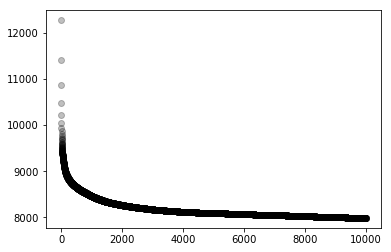

In [28]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [29]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

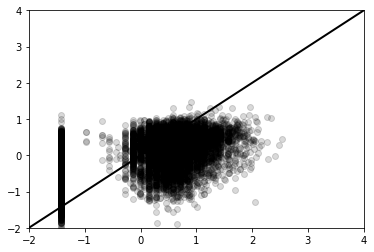

In [30]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [31]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 3178.8140
[torch.FloatTensor of size 1]

In [32]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

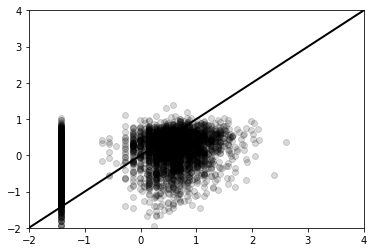

In [33]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

In [34]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.2899  0.0522  0.1339  0.0628 -0.1954 -0.1887  0.0873 -0.1560  0.4407 -0.0798
-0.1542  0.0775 -0.0166  0.2012 -0.0181 -0.0251  0.0038  0.0875 -0.1765  0.2525
 0.3463  0.0311  0.1699  0.3396  0.1466 -0.0721  0.0286 -0.0031  0.0605  0.0192
-0.1374 -0.0172 -0.2725 -0.1544  0.1990 -0.3804  0.2141 -0.1114 -0.2558  0.0758
 0.0629  0.4630 -0.1453  0.0925  0.2066  0.1744 -0.0379  0.1756 -0.3093  0.2037
-0.0127 -0.3471 -0.0457 -0.0509 -0.1183  0.0547 -0.0019  0.0711 -0.1342 -0.0349
 0.0857  0.0899  0.0843  0.0713  0.0016  0.1485 -0.1301 -0.0411 -0.1926 -0.0476
-0.3810  0.4022 -0.0373 -0.3669  0.4451  0.1872 -0.0014 -0.0291 -0.1089 -0.1218
-0.2861  0.0624 -0.0633 -0.2828  0.5134  0.2661  0.0182 -0.2406  0.1275  0.2122
-0.1087  0.0413 -0.0460 -0.3267  0.1490  0.4370 -0.1847  0.0310 -0.3368  0.4047
 0.3845 -0.2194 -0.0309 -0.0345  0.1857 -0.0006 -0.0913 -0.0974  0.1876 -0.2026
 0.3557 -0.2149 -0.1494  0.1221 -0.0768  0.3152 -0.2950  0.0536  0.0664 -0.4082
 

In [35]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.2396  0.6007  0.3150 -0.1374  0.2312 -1.3006 -0.3893 -0.1659  0.0033  0.2318
-0.0311 -0.1747  0.0280 -0.7015  0.4167 -0.1718  0.1935 -0.1410  0.6318 -0.2986
 0.1193  0.1705  0.1071 -0.2782  0.3125  0.0637 -0.7544 -0.0690  0.5393 -0.0295
 0.4050 -0.0591  0.1592  0.2136 -0.0638 -0.7082  0.1033  0.0219  0.4014  0.0641
 0.0670 -1.0646 -1.1680  0.0064  0.5600  0.3464 -0.7283  0.6592 -0.2617  0.1122
 0.2781 -0.0190  0.2036  0.2757  0.4233 -0.0107  0.0755 -0.0454 -0.4945 -0.7895
-0.1894 -0.1943 -0.2517 -0.0671  0.4783  0.4227 -0.6045 -0.3696  0.1146 -0.4387
 0.2539 -0.4187 -0.0865 -0.0444  0.2252  0.0684  0.2171 -1.4614  0.3660 -0.1739
 0.1391  0.1298 -0.1556  0.2617  0.3745 -0.1219 -0.4055 -0.5805  0.2044  0.0283
-0.0969 -0.1249 -0.0898  0.1351  0.2441 -0.1835 -0.1452 -0.5219  0.2877 -0.2723
 0.2733 -0.1771  0.1224 -0.0084  0.1050 -0.2423  0.4055  0.4848  0.1547 -0.1619

Columns 10 to 15 
 0.5860 -0.2820  0.1341  0.1762 -0.1253 -0.3521
-0.5677  0.736

In [36]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.8901 -0.9511 -0.9089  0.9986 -0.7673 -0.5146  0.6924 -0.7505 -0.4196 -0.4655

Columns 10 to 10 
 0.5263
[torch.FloatTensor of size 1x11]

## Round 3: Three-Hidden-Layer Neural Network

In [37]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [38]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 1))

In [39]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

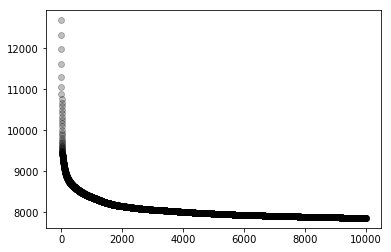

In [40]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [41]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

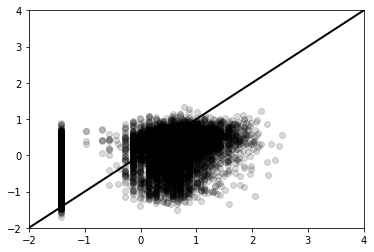

In [42]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [43]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 3130.8745
[torch.FloatTensor of size 1]

In [44]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

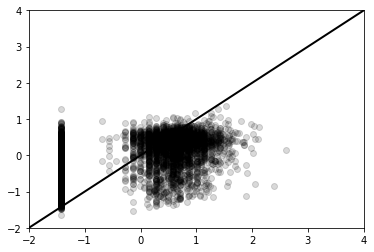

In [45]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

In [46]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0312 -0.1844 -0.0155  0.3349 -0.0633  0.2126 -0.1213  0.1000  0.0615  0.1765
 0.1009  0.4920 -0.0882 -0.0553  0.5780  0.1646 -0.1234  0.2657  0.1097 -0.1572
-0.3298  0.7561 -0.0576 -0.2878  0.2728 -0.0398  0.2496  0.1080 -0.0557 -0.0369
 0.0619 -0.1674  0.0537  0.5033  0.0538 -0.0447  0.1691 -0.2222  0.4469 -0.1880
 0.1795  0.3137 -0.1130  0.0483  0.3163  0.1075 -0.1700  0.1350  0.3525 -0.1114
 0.0050 -0.1826 -0.1059  0.0168 -0.0838  0.1894  0.0222  0.1215 -0.1622 -0.0356
 0.1126 -0.5675 -0.1839 -0.0793 -0.0181 -0.0208 -0.1031  0.0996  0.0311  0.0857
-0.0060  0.2477  0.2112  0.2938  0.0300  0.2401 -0.0687 -0.0258  0.0642  0.1039
 0.2497 -0.0275 -0.1448 -0.0138  0.0815 -0.1322  0.0454 -0.0859  0.1215  0.0777
 0.1465  0.1346  0.1206 -0.3770  0.4048  0.0967 -0.0282 -0.0171 -0.0035 -0.2646
 0.3493  0.2633  0.0175  0.2654 -0.1640 -0.1515  0.3552 -0.3291  0.1806  0.1335
 0.3135  0.0171 -0.2740 -0.1869 -0.0272 -0.0822  0.1192  0.0796  0.1013 -0.1626
 

In [47]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0544  0.0020  0.2350  0.2818  0.2306 -0.9170  0.2100  0.3243 -0.0135  0.2255
-0.1218 -0.1909  0.0950  0.0101  0.5833 -0.0860 -0.7280  0.0099  0.3457  0.3128
-0.1964  0.2260  0.3074  0.1247 -0.0118  0.1780 -0.0429 -0.5789 -0.4791 -0.7291
 0.2200  0.0932  0.3198  0.4198 -0.1879  0.1926  0.1379  0.2037 -0.0428 -0.0397
-0.3722  0.5291 -0.1578  0.5318 -0.1242 -0.1178  0.2046 -0.5271 -0.1454  0.0446
-0.0381 -0.2212  0.6396 -0.1555  0.4239 -0.1372 -0.1106  0.1192  0.2257 -0.2774
-0.8272  0.6531 -0.2990  0.1471 -0.0673  0.2824  0.2120  0.1011  0.0825  0.4507
-0.1966 -0.0971  0.3595 -0.3539  0.0931 -0.0723 -0.1734 -0.2996  0.2232 -0.3037
-0.4460  0.2010 -0.0365 -1.1757 -0.0845 -0.1785 -0.1803  0.2919 -0.6684  0.1712
-0.1598  0.1994 -0.0979  0.1367  0.0750  0.2107 -0.0306 -0.3291 -0.2635 -0.6387
-0.0772 -0.2118  0.2557  0.1296 -0.1195  0.4548  0.0321 -0.0500  0.3077  0.3542

Columns 10 to 15 
 0.0786 -0.0259  0.2335  0.0990  0.0445 -0.2379
-0.0087  0.448

In [48]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.2700 -0.5859  0.2977  0.1837  0.4162 -0.4090  0.6563  0.0211 -0.8774  0.3096
 0.4816  0.4261 -0.2673 -0.7072 -0.0782  0.2624 -0.8480 -0.0959  0.5082 -0.1017
 0.2279  0.3364 -0.3107 -0.1530 -0.2370  0.2408 -0.3389  0.4153  0.4672 -0.1431
 0.1982 -0.8058  0.2597 -0.1288  0.3820 -0.4543  0.6908  0.3168 -1.3485  0.1640
 0.3980  0.7414 -0.4835 -0.5031 -0.3173  0.3885 -0.7048  0.4825 -0.0051  0.2142
 0.3335 -0.0443 -0.1104  0.3123 -0.7263 -0.0248  0.0909  0.1512 -0.8411  0.5068
 0.3531  0.6780 -0.0629 -0.1554 -0.6482  0.6568 -0.8242  0.0500  0.4223 -0.4285

Columns 10 to 10 
-0.1457
 0.4195
 0.2240
-0.3005
 0.3523
 0.1512
 0.3059
[torch.FloatTensor of size 7x11]

In [49]:
model[(6)].weight

Parameter containing:
-0.5691  0.7677  0.4047 -0.4481  0.8201  1.4894 -1.2443
[torch.FloatTensor of size 1x7]

## Round 4: Four-Hidden-Layer Neural Network

In [50]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [51]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 1))

In [52]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

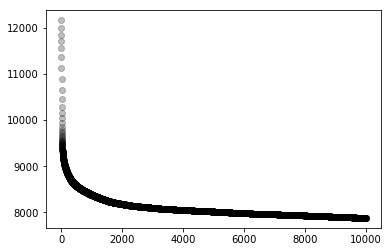

In [53]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [54]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

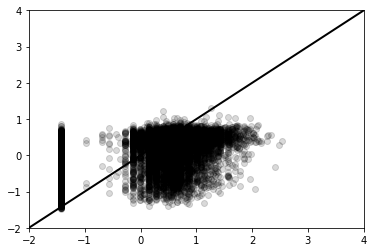

In [55]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.1: Validation Set Performance

In [56]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 3188.9453
[torch.FloatTensor of size 1]

In [57]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

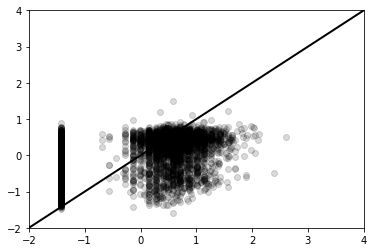

In [58]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

In [59]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0160 -0.0577 -0.0550  0.2373  0.1042 -0.2518 -0.1772  0.0876  0.2718 -0.1734
 0.0345  0.2776 -0.0711  0.4784 -0.2257 -0.0487 -0.0640  0.1183  0.5552  0.0910
 0.2003  0.2718 -0.2517  0.0978 -0.0902 -0.2917 -0.2697 -0.1725  0.0135 -0.2008
 0.3222 -0.0942  0.0244  0.0604 -0.1213  0.0107 -0.0502 -0.1823 -0.1710 -0.1163
-0.3554  0.0326 -0.2561 -0.4593 -0.0702 -0.0347 -0.1179  0.1564  0.0927 -0.2928
-0.0081  0.1746  0.0333  0.2875 -0.1260 -0.0609 -0.2108  0.0312  0.2525 -0.0383
-0.0666  0.1322 -0.0468  0.0588  0.0553 -0.2086  0.0476  0.0992 -0.0259  0.2027
 0.3421  0.5938 -0.1970 -0.1134 -0.0620 -0.1676 -0.0006 -0.0436 -0.2831 -0.2895
-0.3574  0.3022 -0.1455 -0.3517  0.1476 -0.0075  0.1106  0.2289  0.2027  0.2116
-0.1800  0.1860 -0.2112 -0.0649 -0.1143  0.1169 -0.0205  0.1822 -0.2669 -0.0851
 0.0897 -0.2386  0.1090  0.2263 -0.1564  0.0093  0.1266 -0.1852  0.0374 -0.1680
-0.0010  0.1233  0.1027  0.2409 -0.2200 -0.4294  0.0391 -0.0505 -0.0988 -0.0011
-

In [60]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.4768  0.0771 -0.4665  0.3621 -0.2673  0.0149  0.1521 -0.1397 -0.7772  0.0766
-0.7035  0.2475  0.7095 -0.7479  0.1852  0.3408 -0.2222 -0.6922 -0.4036 -0.5747
-0.2588 -0.0130 -0.0073  0.0015 -0.1870 -0.0135 -0.1625 -0.1805  0.0667 -0.0209
-0.1489 -0.1765 -0.2431  0.0749 -0.0377 -0.0840  0.0791  0.0599  0.2705 -0.8452
 0.1344 -0.3709  0.0645 -0.0198  0.0978 -0.4077 -0.1290  0.2354 -0.3297  0.1325
-0.8747  0.0870 -0.3538  0.1133 -0.0924 -0.2315 -0.2962  0.2895 -0.0127 -0.7056
 0.0194 -0.5006  0.2751  0.0941 -0.1386 -0.0543  0.2771 -0.2267  0.2697 -0.0526
 0.0440  0.1044 -0.3758  0.1991  0.2045 -0.5204  0.2802  0.4715 -0.3259 -0.4811
-0.1054 -0.3823  0.0125  0.2279 -0.3545 -0.2701  0.4996 -0.1672  0.0229  0.2652
-0.4954 -0.1282  0.3517  0.0786  0.2952  0.1733 -0.3504 -0.2300 -0.1550  0.3409
-0.4894  0.3439  0.2762  0.1733 -1.1348 -0.8018  0.1914 -0.2699 -0.8143 -0.4493

Columns 10 to 15 
 0.1478 -0.4392  0.2596 -0.3083  0.1683 -0.0665
-0.1382 -0.667

In [61]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.3508 -0.9084  0.3723 -0.1110 -0.3192  0.6988  0.2106 -0.9181 -0.3783  0.0703
 0.2553 -0.3094 -0.0711  0.1180  0.2056 -1.5235  0.2979 -0.2234 -0.2283  0.2468
 0.6424  1.6030 -0.5356  0.4601  0.2717 -1.7188  0.2172  0.4787  0.6552 -0.1154
 0.4497  0.2900 -0.0013  0.6098 -0.0540 -0.9790  0.3757  0.3608  0.2078  0.3884
 0.1494 -0.1498 -0.1947  0.0973  0.2585 -0.2201 -0.2948 -0.0953  0.1766 -0.2984
-0.7165 -2.1704  0.3406 -0.3377 -0.2585  0.9345 -0.2182 -0.3306 -0.2579  0.2246
-0.5182 -1.6269  0.2501 -0.1394 -0.0913  0.4051 -0.0867 -0.1170  0.0115  0.3442

Columns 10 to 10 
 0.3349
-0.6126
-1.9614
-2.1031
 0.2011
 1.0798
-0.7963
[torch.FloatTensor of size 7x11]

In [62]:
model[(6)].weight

Parameter containing:
-0.8851 -1.5261 -0.3040 -1.0787 -0.0267  0.2657  0.4267
-0.3279  0.5317  0.1152  0.3654 -0.1552 -1.2074  0.3230
 0.5756  0.2468 -0.3845 -0.3134 -0.0457  0.0812  0.3250
 0.4807 -0.1591 -1.1183 -0.5312 -0.1906  0.3154  0.5648
 0.3275 -0.2438  0.0237 -0.1049  0.2992 -0.1185 -0.0194
[torch.FloatTensor of size 5x7]

In [63]:
model[(8)].weight

Parameter containing:
 3.0564 -0.8429  0.8109  0.7439 -0.0833
[torch.FloatTensor of size 1x5]

## Round 5: Five-Hidden-Layer Neural Network

In [64]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [65]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 1))

In [66]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

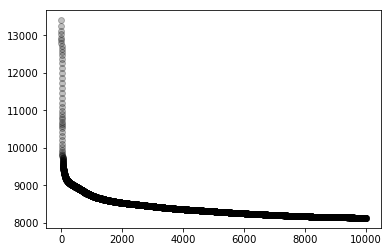

In [67]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [68]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

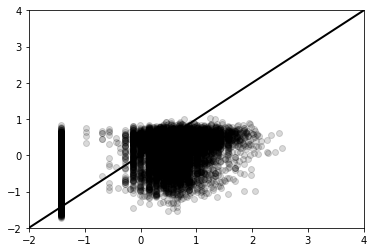

In [69]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.1: Validation Set Performance

In [70]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 3242.7480
[torch.FloatTensor of size 1]

In [71]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

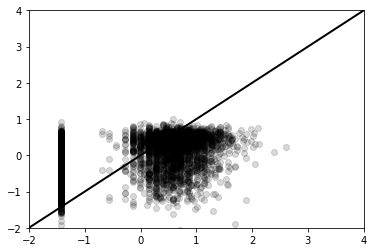

In [72]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

In [73]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.2754  0.2435  0.1377  0.3763 -0.0574 -0.3794  0.2798  0.0194  0.4376  0.2133
 0.2311  0.7804 -0.0475  0.2823  0.2579 -0.3323  0.2055  0.6061 -0.0205  0.0028
 0.2382 -0.1469 -0.1629 -0.0720 -0.0827  0.0391 -0.0194 -0.0563  0.2397 -0.1121
 0.3016  0.0388 -0.2104 -0.3998  0.0532 -0.1322 -0.1265  0.3407 -0.2503  0.0162
 0.2397  0.0010  0.2064 -0.0862 -0.0803 -0.0231 -0.1335  0.2693 -0.0571  0.2587
 0.1633  0.2106 -0.2101 -0.0136 -0.0616  0.2808 -0.1220 -0.1759 -0.0135  0.0889
-0.6595  0.4549 -0.0781  0.6408  0.3416 -0.0734  0.1133 -0.2168  0.0992  0.1271
-0.2685  0.0141  0.1082  0.1971 -0.1462  0.0623 -0.0428 -0.0808  0.0869 -0.1154
 0.0198 -0.3402 -0.0192  0.2102 -0.1006  0.1006  0.1459  0.1049 -0.0487  0.0881
-0.1515  0.5338  0.1524  0.3443  0.3746  0.1436  0.0080 -0.0069  0.4064  0.3047
-0.1921 -0.2669 -0.0810  0.0152 -0.1940 -0.0827  0.3360  0.0172  0.1122 -0.0317
 0.4068  0.1520  0.0926  0.2294 -0.1116 -0.2482 -0.0563 -0.1680 -0.4368 -0.1500
 

In [74]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.1401 -0.1245  0.4514  0.3524  0.1433 -0.6179 -0.0093 -0.0817  0.2182  0.2004
-1.2410 -0.6095 -0.1616  0.4088 -0.2635  0.1730 -0.3651 -0.3097 -0.0055  0.7830
-0.0429  0.8048 -0.0133  0.2341 -0.0659  0.0274 -0.0960  0.6402 -0.0414  0.2395
-0.0353 -0.1147 -0.4176 -0.0678  0.1346  0.0912 -0.1042  0.3195 -0.2548  0.1248
 0.0184 -0.2015  0.2006  0.2748 -0.0479  0.0383  0.3767 -0.0354 -0.1849  0.4239
-0.1585  0.2860  0.2888  0.1349  0.4117 -0.0790  0.3825  0.2288  0.1465  0.1139
 0.0321  0.2497 -0.1252 -0.2433  0.1162  0.0922  0.1510  0.2562 -0.4470  0.4554
-0.8290 -0.2696  0.1941  0.0226 -1.3569  0.1189 -0.9388 -0.5090  0.0896  0.4718
 0.0963  0.0245 -0.2834  0.0874  0.1656  0.2749  0.4491  0.3510 -0.4976  0.0615
 0.4290 -0.0262 -0.3848 -0.2715  0.2975  0.0430  0.2190  0.0466  0.1678  0.3033
 0.1249  0.4139  0.0417  0.4808  0.0489  0.0903  0.3575  0.0563 -0.8001  0.2215

Columns 10 to 15 
-0.3118  0.2986 -0.2857 -0.3360  0.1781 -0.2301
 0.3151  0.087

In [75]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.2024 -0.1622 -0.2401 -0.2129  0.1327  0.0546  0.0335  0.0110 -0.1042  0.0362
-0.7372 -0.4517  0.0841  0.2630 -0.0321  0.3754  0.2610 -1.4152  0.3943  0.4036
 1.2098 -0.7898  0.2456 -0.1497  0.1268 -0.1331 -0.1616  0.0901  0.0458  0.2670
 0.5535 -0.0784 -0.0043  0.2851  0.1914  0.4646  0.4632  0.3006 -0.1510  0.2563
 0.5319  0.3065 -0.2935 -0.5034  0.4371  0.2175  0.0979  0.9313 -0.6032  0.0506
 0.8211 -0.1949  0.3402 -0.3294  0.2419  0.1218  0.2912  0.0483 -0.2087 -0.3793
-0.7908 -0.3004  0.4431  0.2822 -0.3300  0.3357 -0.0181 -1.0640 -0.0326  0.0035

Columns 10 to 10 
-0.2997
 0.4393
 0.3560
 0.3457
 0.2387
 0.1154
 0.5076
[torch.FloatTensor of size 7x11]

In [76]:
model[(6)].weight

Parameter containing:
 0.0764  0.5473 -0.5110  0.2092 -0.4434 -0.2460  0.2528
-0.2656  0.2302 -1.6757  0.0961 -0.5908 -0.0499 -0.0825
 0.0653  0.1484 -0.3291 -0.2701 -0.1136 -0.3313 -0.0798
 0.1724 -0.3387 -0.1289  0.4325  0.4709  0.8706 -0.3394
-0.0882  0.0961  0.1157  0.5116  0.2563  0.5604  0.2278
[torch.FloatTensor of size 5x7]

In [77]:
model[(8)].weight

Parameter containing:
-0.1531 -3.1599  0.2110  0.6346  0.3128
-0.1194  0.2989 -0.4023 -0.2394 -0.3673
 0.6101 -0.3087 -0.0978 -0.8023  0.3739
[torch.FloatTensor of size 3x5]

In [78]:
model[(10)].weight

Parameter containing:
-0.9934  0.2101  0.3331
[torch.FloatTensor of size 1x3]

## Round 6: Six-Hidden-Layer Neural Network

In [79]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [80]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2, 1))

In [81]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

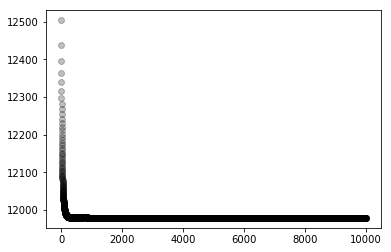

In [82]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [83]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

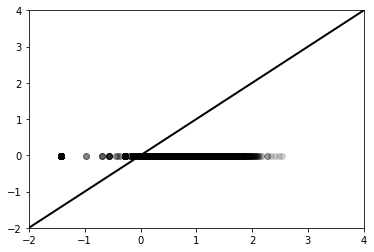

In [84]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.1: Validation Set Performance

In [85]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 3936.8115
[torch.FloatTensor of size 1]

In [86]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

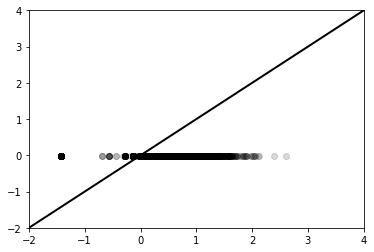

In [87]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

In [88]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0074 -0.1466 -0.1876  0.0478  0.0412  0.0158 -0.1822  0.0513 -0.0087 -0.1888
-0.0194  0.1430 -0.0769  0.1358  0.0794 -0.0723 -0.0232 -0.0282 -0.1209 -0.1130
 0.1690  0.0584 -0.1836  0.0031  0.0580 -0.1658  0.0163  0.1104  0.1177 -0.1292
 0.0393  0.0530  0.0646 -0.1308 -0.0179  0.0404  0.1387 -0.1740  0.0234 -0.1785
 0.1755  0.0169 -0.1522 -0.0588 -0.1127 -0.1520  0.2023 -0.1686 -0.0659  0.0817
-0.0527  0.0076 -0.0363 -0.0893  0.1273 -0.1894  0.0702 -0.0797 -0.1763  0.0307
-0.0201  0.0435  0.0529  0.1032 -0.1178  0.0923 -0.0675 -0.1661 -0.1044  0.1875
 0.1479 -0.0083  0.0742  0.0416  0.0462  0.1007  0.1843  0.0423 -0.0564  0.1485
-0.1790 -0.1909 -0.1021 -0.1362 -0.0880  0.1935 -0.0473 -0.1358  0.1517 -0.1413
 0.1047 -0.0137 -0.0770 -0.1952 -0.0125  0.0882 -0.0545 -0.0716 -0.1439  0.0114
 0.1621  0.0984 -0.1081 -0.0358 -0.1405 -0.1784 -0.1260  0.1004  0.0497  0.1081
 0.0782  0.0905  0.0475 -0.0534 -0.0532  0.1792 -0.0821  0.1242 -0.1264 -0.0137
 

In [89]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.1838  0.0261 -0.0402 -0.0674 -0.0763  0.2423 -0.0436  0.1302 -0.0450  0.1609
 0.0766 -0.1414  0.1030  0.0368 -0.0380 -0.1252 -0.1630  0.0038  0.1827  0.0554
-0.2382 -0.0450  0.1906 -0.1390 -0.1927 -0.1765 -0.2008  0.2458  0.1744  0.1953
-0.0578 -0.1091  0.1381 -0.1752  0.2013 -0.1090  0.0511 -0.2361 -0.0301  0.0527
-0.2481  0.0350 -0.0251  0.0824  0.0604  0.0211  0.2132  0.0749  0.1575 -0.2242
-0.1228  0.1454  0.1039  0.0466  0.0738 -0.1040 -0.1816  0.0411 -0.2212  0.0797
-0.1206  0.0406  0.1814 -0.0137 -0.2114  0.0210  0.2176 -0.1778  0.0291  0.1595
-0.0783 -0.0019  0.1604 -0.0600  0.0019 -0.0692  0.0207 -0.1815  0.0839  0.1273
-0.1341  0.0783  0.1824 -0.0577 -0.1528 -0.1191 -0.2125  0.1883  0.2369 -0.2500
 0.1648  0.0894 -0.1841  0.0796 -0.2293 -0.1144 -0.2338  0.0205 -0.0759  0.1131
 0.0650 -0.0307 -0.0486  0.2353  0.1615  0.1309  0.0370 -0.0396  0.1900  0.1548

Columns 10 to 15 
 0.0613 -0.0728  0.0036 -0.0758 -0.1277 -0.2157
 0.0821  0.141

In [90]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.2598  0.0834 -0.1382 -0.0353 -0.0444 -0.2559  0.2151  0.0321  0.1015  0.3011
 0.1075 -0.1620  0.0757 -0.1293  0.2741 -0.1676  0.2512 -0.2710  0.0504  0.0973
-0.0506  0.0716  0.2833 -0.0760  0.0037 -0.0758 -0.1991 -0.2814 -0.1105  0.2176
 0.1669  0.1416 -0.1874 -0.1293 -0.2761  0.1039 -0.1263  0.0640  0.1889 -0.0871
 0.2735 -0.1269 -0.1292  0.2416 -0.0678 -0.2446 -0.1967 -0.2441 -0.2961 -0.1960
 0.0954 -0.1412 -0.1592 -0.2482 -0.1151  0.2564 -0.0255  0.0160  0.2426  0.0450
 0.2376 -0.2212  0.2527 -0.1492 -0.1106  0.0775 -0.1524 -0.2969 -0.2198 -0.1501

Columns 10 to 10 
-0.2952
 0.0653
 0.2993
-0.1937
 0.2559
-0.1343
 0.1932
[torch.FloatTensor of size 7x11]

In [91]:
model[(6)].weight

Parameter containing:
-0.3353 -0.0517 -0.3013 -0.1436  0.3518 -0.0024 -0.2102
 0.3504  0.3406 -0.0499 -0.0773  0.2439  0.1663 -0.3105
-0.0282  0.2869  0.2154  0.2290  0.2442 -0.3013  0.2084
-0.3604 -0.0225  0.1841 -0.2291 -0.1011  0.0780  0.0779
 0.3249 -0.2272 -0.2916 -0.2064 -0.3302  0.3742  0.1099
[torch.FloatTensor of size 5x7]

In [92]:
model[(8)].weight

Parameter containing:
-0.1356  0.0223  0.0855 -0.0509  0.2449
 0.2064 -0.1295 -0.3096  0.2675  0.0758
 0.2750 -0.2623  0.1045 -0.1829  0.3944
[torch.FloatTensor of size 3x5]

In [93]:
model[(10)].weight

Parameter containing:
-0.2012 -0.4205  0.0763
 0.2457  0.4333  0.2924
[torch.FloatTensor of size 2x3]

In [94]:
model[(12)].weight

Parameter containing:
-0.0501  0.3532
[torch.FloatTensor of size 1x2]

## Round 7: Linear Regression

In [95]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [96]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(24, 1))

In [97]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

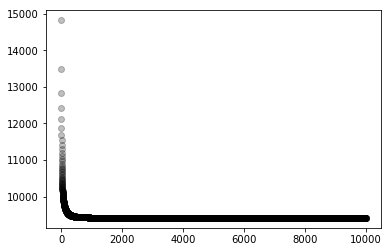

In [98]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [99]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

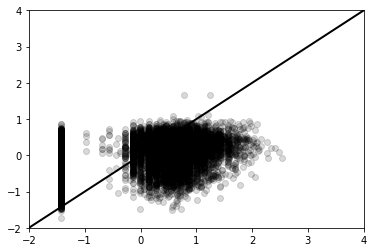

In [100]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.1: Validation Set Performance

In [101]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 3193.6323
[torch.FloatTensor of size 1]

In [102]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

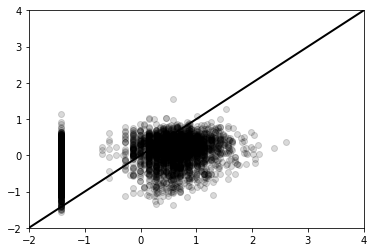

In [103]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

In [104]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0068  0.1076 -0.0014 -0.0132 -0.0016 -0.0726  0.0413 -0.0035  0.0946  0.0910

Columns 10 to 19 
-0.0043 -0.0200 -0.0581  0.0439  0.0159  0.0277  0.0027 -0.1834 -0.0437  0.1718

Columns 20 to 23 
 0.1309  0.0087  0.0447  0.0474
[torch.FloatTensor of size 1x24]